# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [10]:
def apply_svd_custom(X_train, X_test, n_components):
    # Dimensionality reduction using SVD
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean

    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]

    V = eigenvectors[:, :n_components]

    X_train_reduced = np.dot(X_train_centered, V)
    X_test_reduced = np.dot(X_test_centered, V)

    return X_train_reduced, X_test_reduced, V


## Part 3: Train Logistic Regression and Measure Performance

In [3]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [11]:
svd_components = [784, 200, 100, 50, 25, 10]

results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_reduced, X_test_reduced, V = apply_svd_custom(X_train, X_test, n_components)

    # Train logistic regression and measure performance
    accuracy, training_time = train_logistic_regression(X_train_reduced, y_train, X_test_reduced, y_test)

    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })

    print(f"Accuracy: {accuracy:.4f}, Training Time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...
Accuracy: 0.9208, Training Time: 37.9167 seconds
Applying custom SVD with 200 components...
Accuracy: 0.9203, Training Time: 8.0806 seconds
Applying custom SVD with 100 components...
Accuracy: 0.9175, Training Time: 3.7359 seconds
Applying custom SVD with 50 components...
Accuracy: 0.9083, Training Time: 2.7891 seconds
Applying custom SVD with 25 components...
Accuracy: 0.8858, Training Time: 2.6737 seconds
Applying custom SVD with 10 components...
Accuracy: 0.8036, Training Time: 1.6330 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


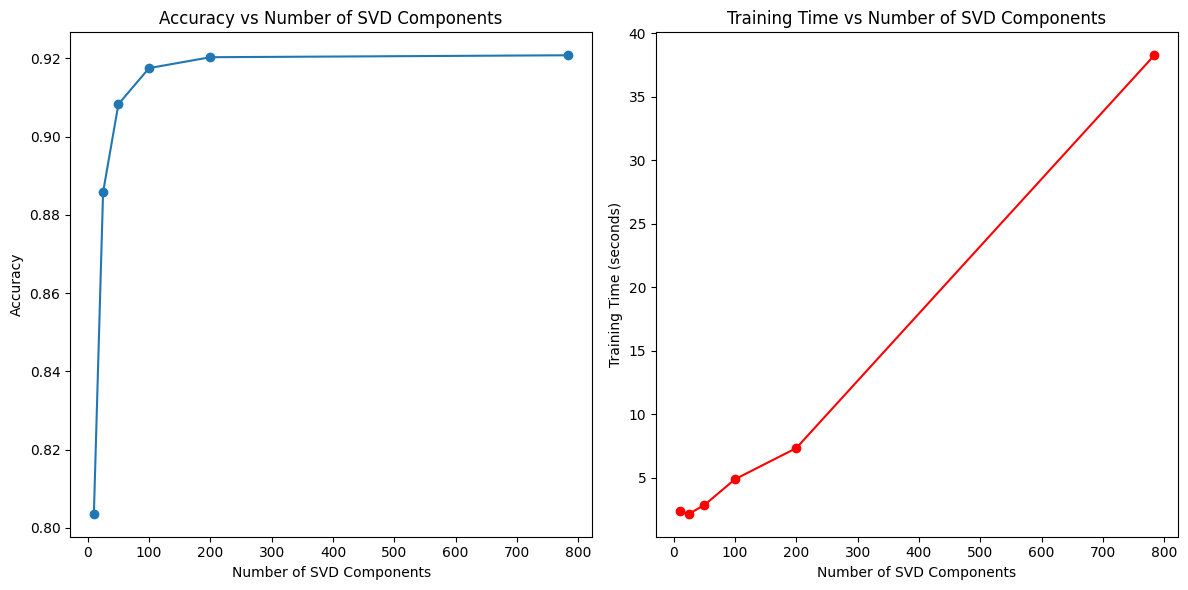

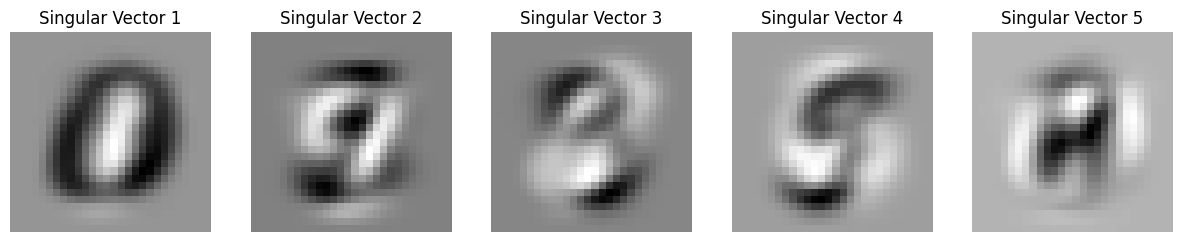

In [9]:
# Convert results to numpy arrays for easier manipulation
n_components_arr = [res['n_components'] for res in results]
accuracy_arr = [res['accuracy'] for res in results]
training_time_arr = [res['training_time'] for res in results]

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(n_components_arr, accuracy_arr, marker='o')
plt.title('Accuracy vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')

# Plot training time
plt.subplot(1, 2, 2)
plt.plot(n_components_arr, training_time_arr, marker='o', color='red')
plt.title('Training Time vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()

top_singular_vectors = V[:, :5]  # Take the top 5 singular vectors (from the V matrix)

# Plot vectors as 28x28 images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(top_singular_vectors[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Singular Vector {i+1}')
    ax.axis('off')

plt.show()



## Part 6: Analyze / Conclusion

YOUR ANSWER:

### Analysis and Conclusion:

The **accuracy vs. number of SVD components** plot demonstrates that accuracy tends to increase as more components are included, but beyond a certain point, the accuracy plateaus. This suggests that using a moderate number of components (e.g., 100-200) retains most of the essential information without the need for all 784 components. Meanwhile, the **training time** decreases significantly as the number of SVD components is reduced, showing that dimensionality reduction enhances computational efficiency.

The **singular vectors** visualize the most important features in the dataset, revealing patterns like edges and shapes in the digits. Based on the results, the optimal trade-off between accuracy and efficiency seems to occur when using around 100-200 components, as this provides a good balance between retaining predictive performance and reducing training time.